<a href="https://colab.research.google.com/github/pratyushgta/image-video-processing/blob/main/IVP_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ***Pratyush Kumar***
##### *N052*
##### *MBA Tech CE (div. D)*

# EXPERIMENT 0

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt # used for plotting/displaying the image. without this lib, pic will be displayed as a set of numbers / pixels
import numpy as np
# following will be used in filtering & saltpepper
from skimage import io
from skimage.color import rgb2gray
from scipy import signal

In [ ]:
im = mpimg.imread("LisaMona2.jpeg") # b&w
imc = mpimg.imread("LisaMona3.jpeg") # rgb/ colored
imh = mpimg.imread("LisaMonaHouse.png")

In [ ]:
print(im.shape,im.dtype,type(im))

(480, 480) uint8 <class 'numpy.ndarray'>


> **0.a. PLOTTING IMAGE**

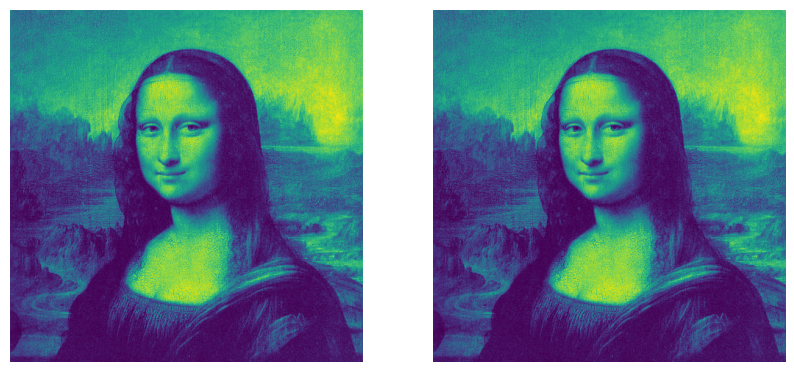

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1) # 1 row, 2 cols, 1st location
plt.imshow(im)
plt.axis('off')

plt.subplot(1,2,2) # 1 row, 2 cols, 2nd location
plt.imshow(im)
plt.axis('off')
plt.show()

> **0.b. DARKENING IMAGE**

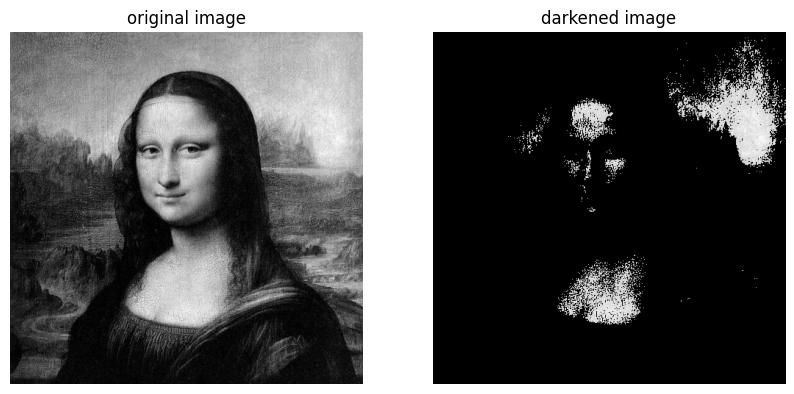

In [ ]:
#change image to darker color
im_dark=im.copy()
im_dark[im_dark<200]=0

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(im,cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("darkened image")
plt.imshow(im_dark,cmap='gray')
plt.axis('off')
plt.show()

# EXPERIMENT 1

> **1.a NEGATIVE IMAGE**

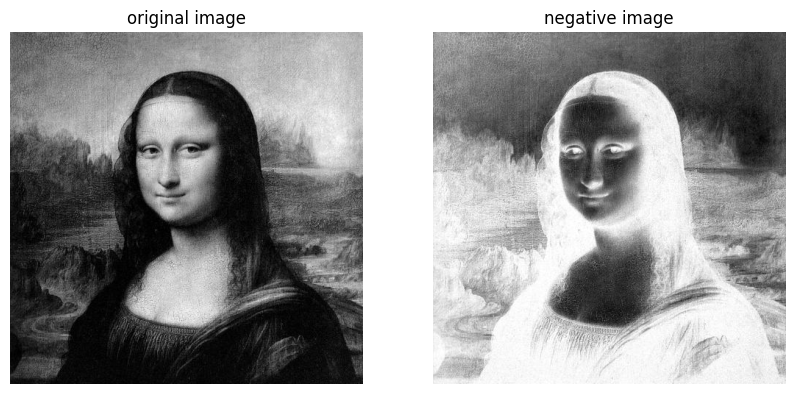

In [ ]:
im_neg = im.copy()
im_neg = 255-im_neg

plt.figure(figsize=(10,10))
plt.subplot(1,2,1) # 1 row, 2 cols, 1st location
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(1,2,2) # 1 row, 2 cols, 2nd location
plt.imshow(im_neg,cmap='gray')
plt.axis('off')
plt.title('negative image')
plt.show()

> **1.b IMAGE THRESHOLDING**

In [ ]:
im

array([[113, 111,  90, ..., 169, 175, 173],
       [109, 106,  93, ..., 176, 181, 186],
       [125, 116, 108, ..., 178, 180, 193],
       ...,
       [ 26,  15,   9, ...,  17,  21,  17],
       [ 23,  18,  15, ...,  16,  26,  22],
       [ 16,  18,  18, ...,  15,  20,  11]], dtype=uint8)

Enter threshold: 50


Text(0.5, 1.0, 'threshold image')

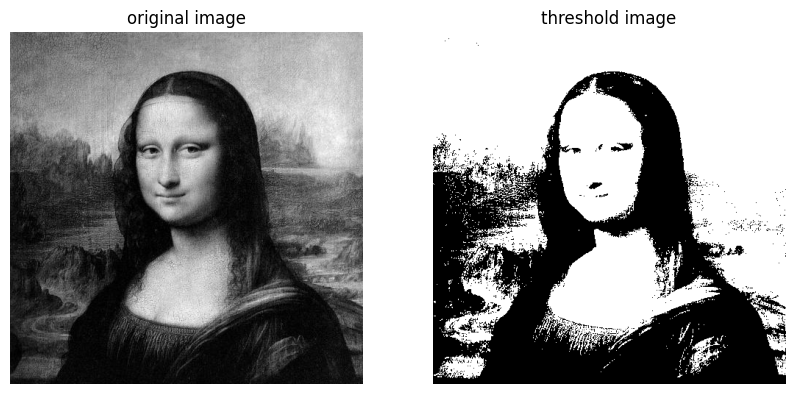

In [ ]:
threshold = int(input("Enter threshold: "))
im_copy = im.copy()
#print(im_copy.flags)
for i in range(im_copy.shape[0]):
    for j in range(im_copy.shape[1]):
        if im_copy[i, j] < threshold:
            im_copy[i, j] = 0
        else:
            im_copy[i, j] = 255

plt.figure(figsize=(10,10))
plt.subplot(1,2,1) # 1 row, 2 cols, 1st location
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(1,2,2) # 1 row, 2 cols, 2nd location
plt.imshow(im_copy,cmap='gray')
plt.axis('off')
plt.title('threshold image')

> **1.c CONTRAST STRETCHING**

In [ ]:
print(im.shape,im.dtype,type(im))
im
smallest = np.amin(im) # min intensity value
biggest = np.amax(im) # max intensity value
print(smallest,biggest)

(480, 480) uint8 <class 'numpy.ndarray'>
0 248


Enter r1: 50
Enter s1: 0
Enter r2: 100
Enter s2: 255


Text(0.5, 1.0, 'contrast stretched image')

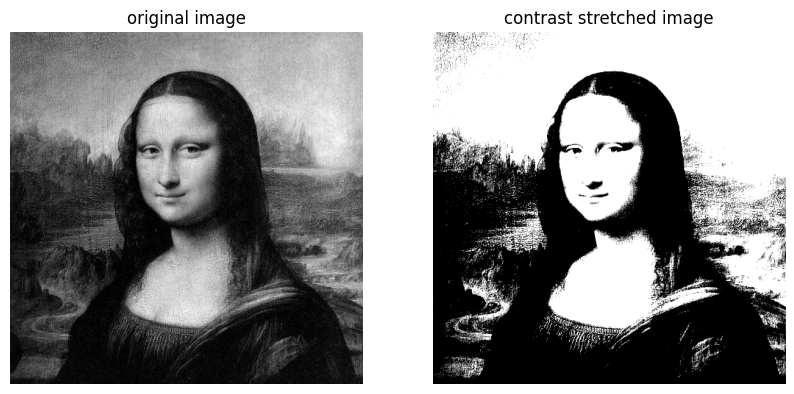

In [ ]:
r1 = int(input("Enter r1: "))
s1 = int(input("Enter s1: "))
r2 = int(input("Enter r2: "))
s2 = int(input("Enter s2: "))

L = 256
# finding slopes
# slope = (y2 - y1)/(x2 - x1)
alpha  = s1/r1 # slope(0, 0, r1, s1)
beta = (s2-s1)/(r2-r1) # slope(r1, s1, r2, s2)
gamma = ((L-1)-s2)/((L-1)-r2) # slope(r2, s2, 255, 255)

im_copy4 = im.copy()

for i in range(im_copy4.shape[0]):
    for j in range(im_copy4.shape[1]):
        if 0 <= im_copy4[i, j] <= r1:
            im_copy4[i, j] = alpha * im_copy4[i, j]
        elif r1 < im_copy4[i,j] <= r2:
          im_copy4[i, j] = beta*(im_copy4[i, j]-r1)+s1
        elif r2 < im_copy4[i,j] <= (L-1):
          im_copy4[i, j] = gamma*(im_copy4[i, j]-r2)+s2
im_copy4[i, j]

plt.figure(figsize=(10,10))
plt.subplot(1,2,1) # 1 row, 2 cols, 1st location
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(1,2,2) # 1 row, 2 cols, 2nd location
plt.imshow(im_copy4,cmap='gray')
plt.axis('off')
plt.title('contrast stretched image')

> **1.d GRAY LEVEL SLICING**

Enter r1: 0
Enter r2: 50


Text(0.5, 1.0, 'original image')

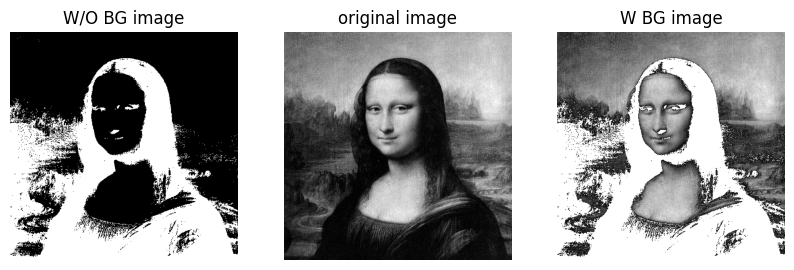

In [ ]:
r1 = int(input("Enter r1: "))
r2 = int(input("Enter r2: "))
L = 256
im_copy2 = im.copy()
im_copy3 = im.copy()

# WITHOUT BG
for i in range(im_copy2.shape[0]):
    for j in range(im_copy2.shape[1]):
        if r1 <= im_copy2[i, j] <= r2:
            im_copy2[i, j] = L-1
        else:
            im_copy2[i, j] = 0

plt.figure(figsize=(10,10))
plt.subplot(1,3,1) # 1 row, 3 cols, 1st location
plt.imshow(im_copy2,cmap='gray')
plt.axis('off')
plt.title('W/O BG image')

# WITH BG
for i in range(im_copy3.shape[0]):
    for j in range(im_copy3.shape[1]):
        if r1 <= im_copy3[i, j] <= r2:
            im_copy3[i, j] = L-1

plt.subplot(1,3,3) # 1 row, 3 cols, 3rd location
plt.imshow(im_copy3,cmap='gray')
plt.axis('off')
plt.title('W BG image')

# OG IMG
plt.subplot(1,3,2) # 1 row, 3 cols, 2nd location
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('original image')

# EXPERIMENT 2

> **2.a CHANGE RESOLUTION**

In [ ]:
# change number of levels from 2^8=256 to 2^b
im_reso = im.copy()
b=2
num_levels = 2**b
step_level = int(256/num_levels)
print(num_levels)

4


In [ ]:
sh=im_reso.shape
pixel_value=0
for row in range(0,sh[0]):
  for col in range(0,sh[1]):
    temp = im_reso[row][col]
    for i in range(0,num_levels):
      if temp >= i*step_level and temp<(i+1)*step_level:
        im_reso[row][col]=i*step_level
        break

Text(0.5, 1.0, 'new image')

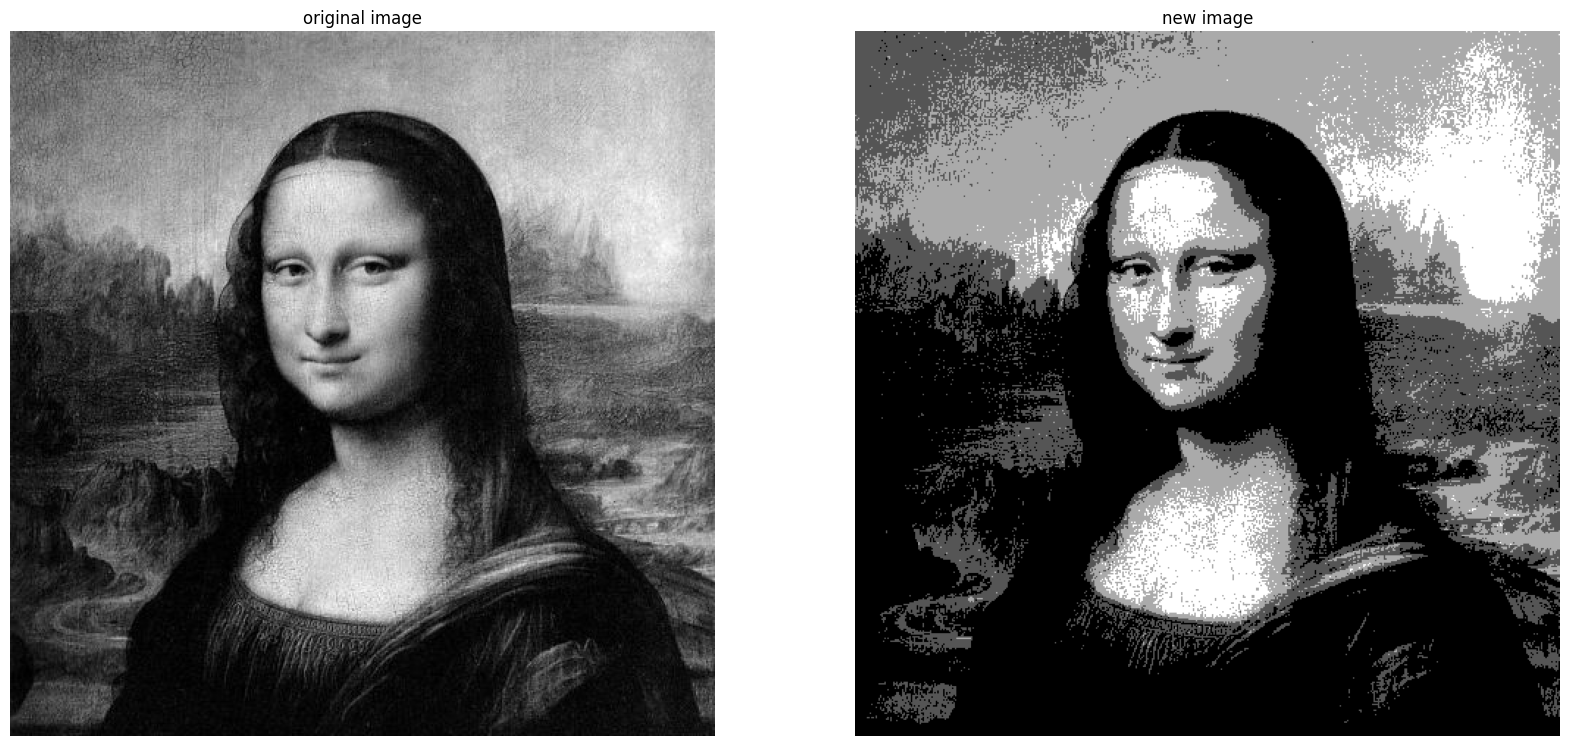

In [ ]:
# plotting
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(1,2,2)
plt.imshow(im_reso,cmap='gray')
plt.axis('off')
plt.title('new image')

> **2.b DOWNSAMPLING**

In [ ]:
def downsampling(im_down,ds):
  sh = imc.shape
  rowd = int(sh[0]/ds)+1
  cold = int(sh[1]/ds)+1
  im_down = im_down[0:rowd,0:cold]
  sh = im_down.shape
  sh = imc.shape
  rw = 0
  cl = 0
  #choose every ds row and column
  for row in range(0,sh[0],ds):
    cl=0
    for col in range(0,sh[1],ds):
      im_down[rw][cl]=imc[row][col]
      cl = cl+1
    rw = rw+1
  return im_down

In [ ]:
im_down = imc.copy()
#downscale by a factor, ds=2,5,10,50
im_down2 = downsampling(im_down, 2)
im_down5 = downsampling(im_down, 5)
im_down10 = downsampling(im_down, 10)
im_down50 = downsampling(im_down, 50)

Text(0.5, 1.0, 'ds factor 50')

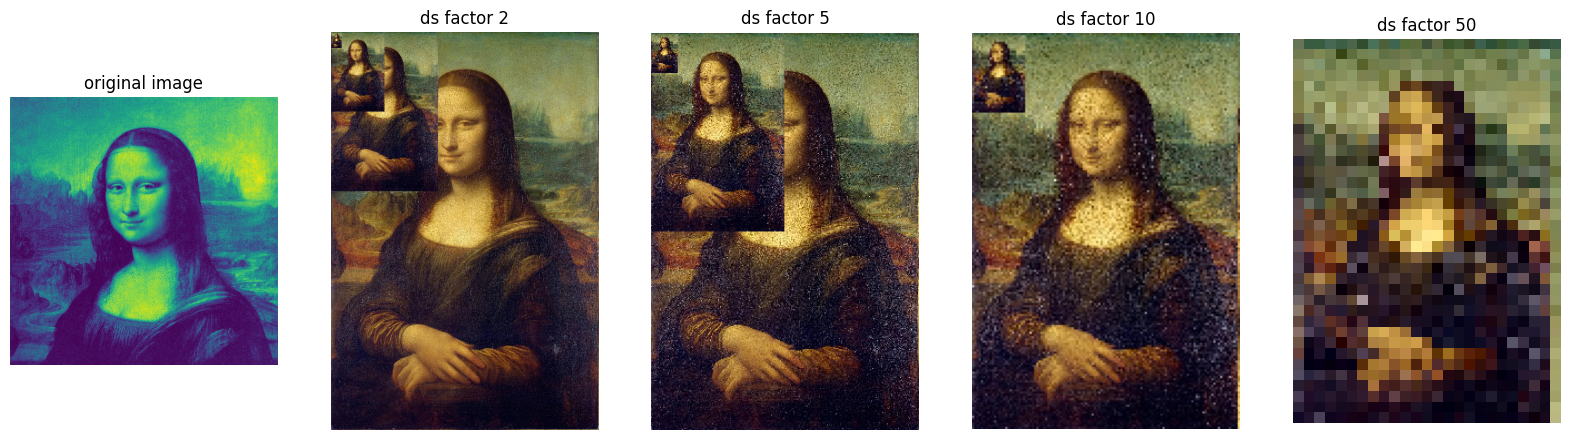

In [ ]:
# plotting
plt.figure(figsize=(20,20))
plt.subplot(1,5,1)
plt.imshow(im)
plt.axis('off')
plt.title('original image')

plt.subplot(1,5,2)
plt.imshow(im_down2)
plt.axis('off')
plt.title('ds factor 2')

plt.subplot(1,5,3)
plt.imshow(im_down5)
plt.axis('off')
plt.title('ds factor 5')

plt.subplot(1,5,4)
plt.imshow(im_down10)
plt.axis('off')
plt.title('ds factor 10')

plt.subplot(1,5,5)
plt.imshow(im_down50)
plt.axis('off')
plt.title('ds factor 50')

> **2.c UPSAMPLING**

In [ ]:
im_down = im_down10.copy()
print(im_down.shape,im_down.dtype,type(im_down))

(179, 121, 3) uint8 <class 'numpy.ndarray'>


In [ ]:
im_up = imc.copy()
print(im_up.shape,im_up.dtype,type(im_up))

(1788, 1200, 3) uint8 <class 'numpy.ndarray'>


Text(0.5, 1.0, 'upsampled image')

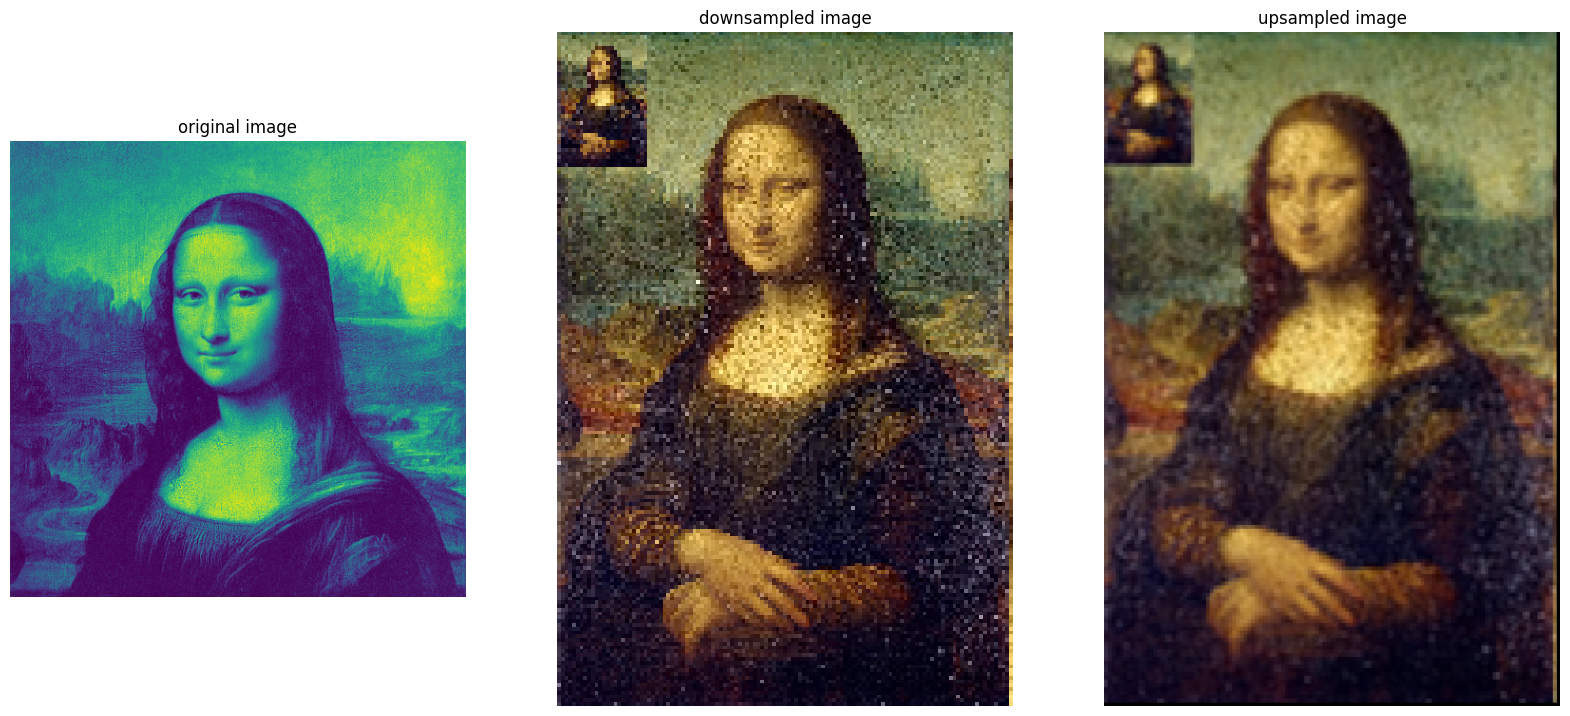

In [ ]:
# use downscaled image generated in above program
# upscale by a factor ds=5 in downsampled image
ds = 10

im_down = im_down10.copy()
im_up = imc.copy()

sh = im_down.shape
# Calculate the dimensions of the upsampled image
shu = (sh[0] * ds, sh[1] * ds)
im_up = np.zeros((shu[0], shu[1], 3), dtype=np.uint8)

rw = 0
cl = 0
#insert 0s in downsampled image to regain its size
for row in range(0, sh[0]):
  cl=0
  for col in range(0, sh[1]):
    im_up[rw][cl] = im_down[row][col]
    im_up[rw,cl+1:cl+ds]=0
    cl=cl+ds
  im_up[rw+1:rw+ds,:]=0
  rw=rw+ds

# plotting
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(im)
plt.axis('off')
plt.title('original image')

plt.subplot(1,3,2)
plt.imshow(im_down)
plt.axis('off')
plt.title('downsampled image')

shu = im_up.shape

#use average method for interpolation
for row in range(0,shu[0],ds):
  for col in range(0,shu[1]-ds,ds):
    temp1=(im_up[row,col])/2
    temp2=(im_up[row,col+ds])/2
    temp=temp1+temp2
    im_up[row,col+1:col+ds] = [int(temp[0]),int(temp[1]),int(temp[2])]

for row in range(0,shu[0]-ds,ds):
  for col in range(0,shu[1]):
    temp1=(im_up[row,col])/2
    temp2=(im_up[row+ds,col])/2
    temp=temp1+temp2
    im_up[row:row+ds,col] = [int(temp[0]),int(temp[1]),int(temp[2])]


plt.subplot(1,3,3)
plt.imshow(im_up)
plt.axis('off')
plt.title('upsampled image')

# EXPERIMENT 3

> **3. HISTOGRAM EQUALISATION**

In [ ]:
im_copy6 = im.copy()
num_pix = im_copy6.shape[0]*im_copy6.shape[1]
imhist,bins=np.histogram(im_copy6.flatten(),256) # flatten = convert 2D array to 1D array.
# bins are numbers on x axis. imhist is variable where count of each pixel will be stored in im_hist.
imhist

array([1450, 1109, 1710, 2391, 2926, 3656, 3919, 4033, 4031, 3867, 3649,
       3164, 3041, 2776, 2591, 2382, 2273, 2137, 2010, 1890, 1780, 1705,
       1618, 1525, 1456, 1417, 1403, 1360, 1429, 1304, 1326,    0, 1294,
       1224, 1233, 1186, 1170, 1099, 1165, 1135, 1034, 1036,  946,  995,
       1059,  976,  981,  977,  993,  902,  924,  905,  882,  853,  844,
        879,  798,  816,  836,  794,  753,  805,  797,    0,  795,  762,
        780,  781,  773,  722,  785,  745,  719,  776,  746,  738,  775,
        732,  763,  704,  753,  723,  746,  719,  753,  727,  755,  716,
        697,  697,  731,  756,  789,  764,  771,    0,  707,  765,  774,
        736,  783,  705,  729,  744,  765,  725,  729,  701,  736,  754,
        730,  732,  736,  731,  714,  711,  755,  752,  755,  739,  706,
        746,  750,  761,  740,  717,  693,    0,  787,  767,  811,  789,
        769,  764,  791,  851,  762,  777,  849,  799,  763,  817,  810,
        802,  754,  812,  787,  820,  838,  858,  7

In [ ]:
# calculate cum freq of imhist
cdf = imhist.cumsum()
cdf

array([  1450,   2559,   4269,   6660,   9586,  13242,  17161,  21194,
        25225,  29092,  32741,  35905,  38946,  41722,  44313,  46695,
        48968,  51105,  53115,  55005,  56785,  58490,  60108,  61633,
        63089,  64506,  65909,  67269,  68698,  70002,  71328,  71328,
        72622,  73846,  75079,  76265,  77435,  78534,  79699,  80834,
        81868,  82904,  83850,  84845,  85904,  86880,  87861,  88838,
        89831,  90733,  91657,  92562,  93444,  94297,  95141,  96020,
        96818,  97634,  98470,  99264, 100017, 100822, 101619, 101619,
       102414, 103176, 103956, 104737, 105510, 106232, 107017, 107762,
       108481, 109257, 110003, 110741, 111516, 112248, 113011, 113715,
       114468, 115191, 115937, 116656, 117409, 118136, 118891, 119607,
       120304, 121001, 121732, 122488, 123277, 124041, 124812, 124812,
       125519, 126284, 127058, 127794, 128577, 129282, 130011, 130755,
       131520, 132245, 132974, 133675, 134411, 135165, 135895, 136627,
      

In [ ]:
cdf = cdf/num_pix
cdf
#newgray = (cdf*255/px).astype(int)

array([0.0062934 , 0.01110677, 0.01852865, 0.02890625, 0.0416059 ,
       0.05747396, 0.07448351, 0.09198785, 0.10948351, 0.12626736,
       0.14210503, 0.15583767, 0.16903646, 0.18108507, 0.19233073,
       0.20266927, 0.21253472, 0.2218099 , 0.23053385, 0.23873698,
       0.24646267, 0.25386285, 0.26088542, 0.26750434, 0.27382378,
       0.27997396, 0.28606337, 0.29196615, 0.2981684 , 0.30382813,
       0.30958333, 0.30958333, 0.31519965, 0.32051215, 0.32586372,
       0.33101128, 0.33608941, 0.34085938, 0.3459158 , 0.35084201,
       0.35532986, 0.35982639, 0.36393229, 0.36825087, 0.37284722,
       0.37708333, 0.38134115, 0.3855816 , 0.38989149, 0.39380642,
       0.39781684, 0.40174479, 0.40557292, 0.40927517, 0.41293837,
       0.41675347, 0.42021701, 0.42375868, 0.42738715, 0.43083333,
       0.43410156, 0.43759549, 0.44105469, 0.44105469, 0.44450521,
       0.4478125 , 0.45119792, 0.45458767, 0.45794271, 0.46107639,
       0.46448351, 0.46771701, 0.47083767, 0.47420573, 0.47744

In [ ]:
cdf = cdf*255
new_gray = cdf.astype(int) # round off cdf to integer
new_gray

array([  1,   2,   4,   7,  10,  14,  18,  23,  27,  32,  36,  39,  43,
        46,  49,  51,  54,  56,  58,  60,  62,  64,  66,  68,  69,  71,
        72,  74,  76,  77,  78,  78,  80,  81,  83,  84,  85,  86,  88,
        89,  90,  91,  92,  93,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 108, 109, 110, 111, 112, 112, 113,
       114, 115, 115, 116, 117, 118, 119, 120, 120, 121, 122, 123, 124,
       125, 125, 126, 127, 128, 129, 129, 130, 131, 132, 133, 133, 134,
       135, 136, 137, 138, 138, 138, 139, 140, 141, 142, 143, 143, 144,
       145, 146, 147, 147, 148, 149, 150, 151, 152, 152, 153, 154, 155,
       156, 156, 157, 158, 159, 160, 161, 161, 162, 163, 163, 164, 165,
       166, 166, 167, 168, 169, 170, 171, 172, 173, 173, 174, 175, 176,
       177, 178, 179, 180, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 21

Text(0.5, 1.0, 'new image')

<Figure size 640x480 with 0 Axes>

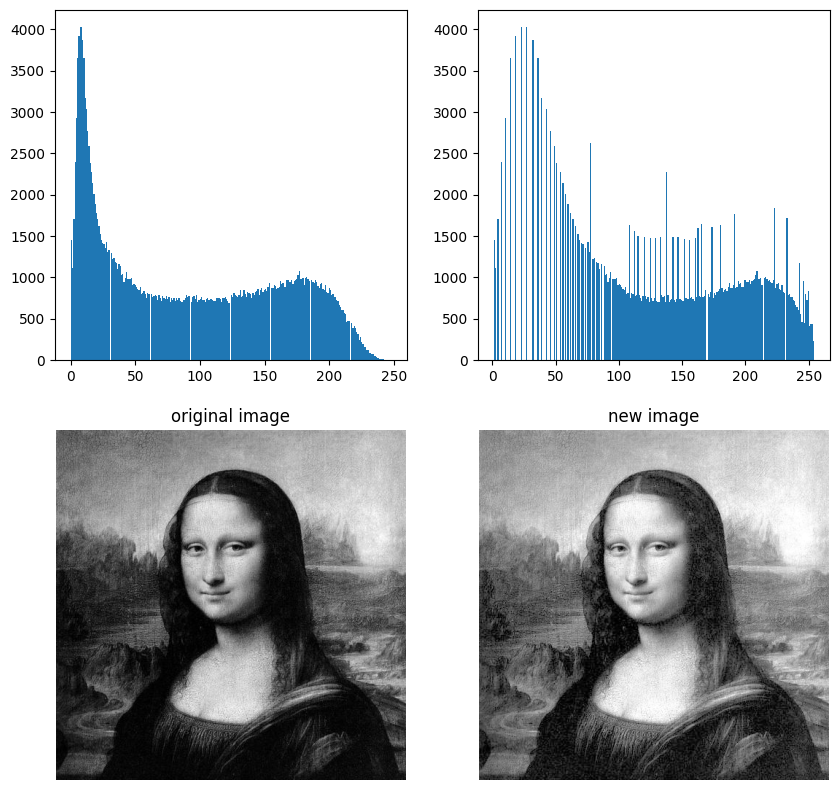

In [ ]:
image_eq=im.copy()
for i in range(im.shape[0]):
  for j in range(im.shape[1]):
    temp = image_eq[i][j]
    image_eq[i][j] = new_gray[temp]

# plotting histograms
plt.figure()
plt.figure(figsize=(10,10))
plt.subplot(2,2,1) # 2 row, 2 cols, 1st location
ax = plt.hist(im_copy6.ravel(),bins=256)
plt.subplot(2,2,2)
ax = plt.hist(image_eq.ravel(),bins=256)

# displaying images
plt.subplot(2,2,3)
plt.imshow(im_copy6,cmap='gray')
plt.axis('off')
plt.title('original image')

plt.subplot(2,2,4) # 1 row, 2 cols, 1st location
plt.imshow(image_eq,cmap='gray')
plt.axis('off')
plt.title('new image')


> **BIT PLANE SLICING**

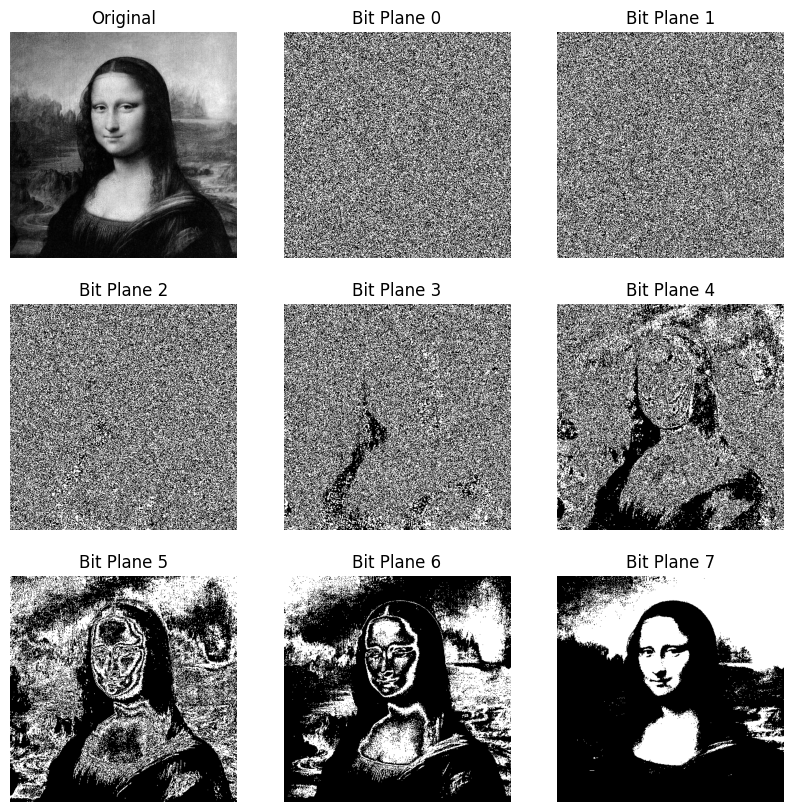

In [ ]:
imgbit = im.copy()

def decimalToBinary(n):
    return '{:08b}'.format(int(n))

def plot(im, i, title):
  plt.subplot(3, 3, i)
  plt.imshow(im, cmap = 'gray')
  plt.title(title)
  plt.axis('off')

bit = im.copy()

plt.figure(figsize=(10, 10))

plot(im, 1, 'Original')

for k in range(8):
  for i in range(imgbit.shape[0]):
    for j in range(imgbit.shape[1]):
      r = list(decimalToBinary(imgbit[i, j]))
      bit[i, j] = int(r[k])
  plot(bit, abs(k-7)+2, 'Bit Plane ' + str(abs(k-7)))
plt.show()

# Plotting all Images

**ALL TRANSFORMED IMAGES**

Text(0.5, 1.0, 'upsampled image')

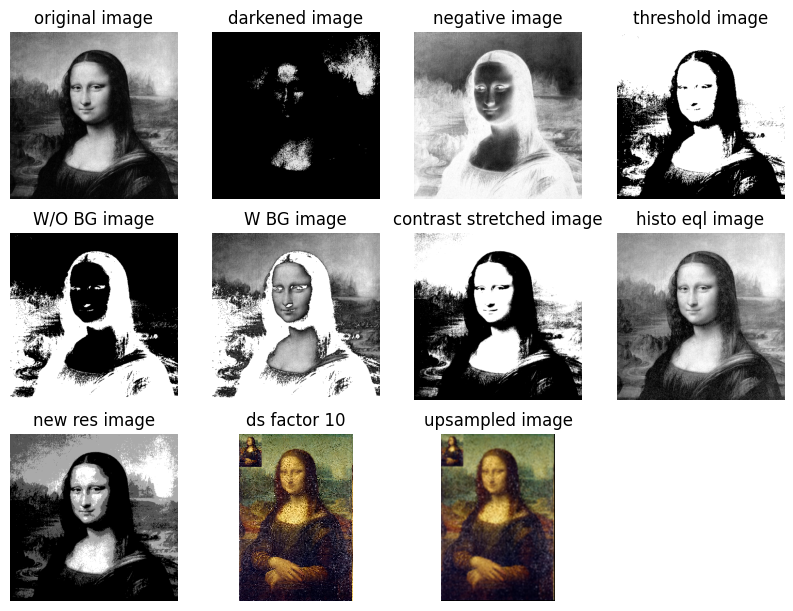

In [ ]:
plt.figure(figsize=(10,10))

# OG Image
plt.subplot(4,4,1)
plt.title("original image")
plt.imshow(im,cmap='gray')
plt.axis('off')
# Dark Image
plt.subplot(4,4,2)
plt.title("darkened image")
plt.imshow(im_dark,cmap='gray')
plt.axis('off')
# Neg Image
plt.subplot(4,4,3)
plt.imshow(im_neg,cmap='gray')
plt.axis('off')
plt.title('negative image')
# Threshold Image
plt.subplot(4,4,4)
plt.imshow(im_copy,cmap='gray')
plt.axis('off')
plt.title('threshold image')
# W/O BG Image
plt.subplot(4,4,5)
plt.imshow(im_copy2,cmap='gray')
plt.axis('off')
plt.title('W/O BG image')
# W BG Image
plt.subplot(4,4,6)
plt.imshow(im_copy3,cmap='gray')
plt.axis('off')
plt.title('W BG image')
# Contrast Streteched Image
plt.subplot(4,4,7)
plt.imshow(im_copy4,cmap='gray')
plt.axis('off')
plt.title('contrast stretched image')
# histogram equalisation
plt.subplot(4,4,8)
plt.imshow(image_eq,cmap='gray')
plt.axis('off')
plt.title('histo eql image')
# change resolution
plt.subplot(4,4,9)
plt.imshow(im_reso,cmap='gray')
plt.axis('off')
plt.title('new res image')
# downsampled image
plt.subplot(4,4,10)
plt.imshow(im_down10)
plt.axis('off')
plt.title('ds factor 10')
#upsampled image
plt.subplot(4,4,11)
plt.imshow(im_up)
plt.axis('off')
plt.title('upsampled image')